In [76]:
# TASK 1
import pandas as pd

# Load the dataset (replace 'dataset.csv' with your actual filename)
df = pd.read_csv(r'C:\Users\Komal Jain\OneDrive\Desktop\New folder (2)\cognifyzdataset.csv')

# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")





Number of rows: 9551
Number of columns: 21


In [77]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Komal Jain\OneDrive\Desktop\New folder (2)\cognifyzdataset.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Handling missing values based on column type

# 1. Fill missing values for numerical columns with median
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.median()))

# 2. Fill missing values for categorical columns with mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Verify if missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())

# Save the cleaned dataset if needed
df.to_csv(r'C:\Users\Komal Jain\OneDrive\Desktop\New folder (2)\cognifyzdataset_cleaned.csv', index=False)

print("\nData cleaning complete. Missing values handled and saved.")


Missing values in each column:
Cuisines    9
dtype: int64

Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Data cleaning complete. Missing values handled and saved.


In [78]:
print(df.dtypes)


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [79]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': True, 'No': False})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': True, 'No': False})
df['Currency'] = df['Currency'].astype('category')
df['Rating color'] = df['Rating color'].astype('category')


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Restaurant ID         9551 non-null   int64   
 1   Restaurant Name       9551 non-null   object  
 2   Country Code          9551 non-null   int64   
 3   City                  9551 non-null   object  
 4   Address               9551 non-null   object  
 5   Locality              9551 non-null   object  
 6   Locality Verbose      9551 non-null   object  
 7   Longitude             9551 non-null   float64 
 8   Latitude              9551 non-null   float64 
 9   Cuisines              9551 non-null   object  
 10  Average Cost for two  9551 non-null   int64   
 11  Currency              9551 non-null   category
 12  Has Table booking     9551 non-null   bool    
 13  Has Online delivery   9551 non-null   bool    
 14  Is delivering now     9551 non-null   bool    
 15  Swit

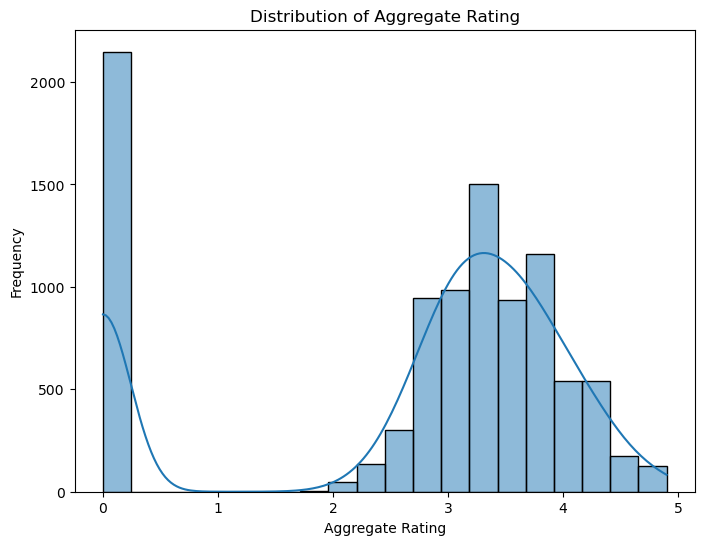

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


In [82]:
print(df['Aggregate rating'].value_counts())


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [83]:
df['Aggregate rating'] = df['Aggregate rating'].replace(0.0, pd.NA)


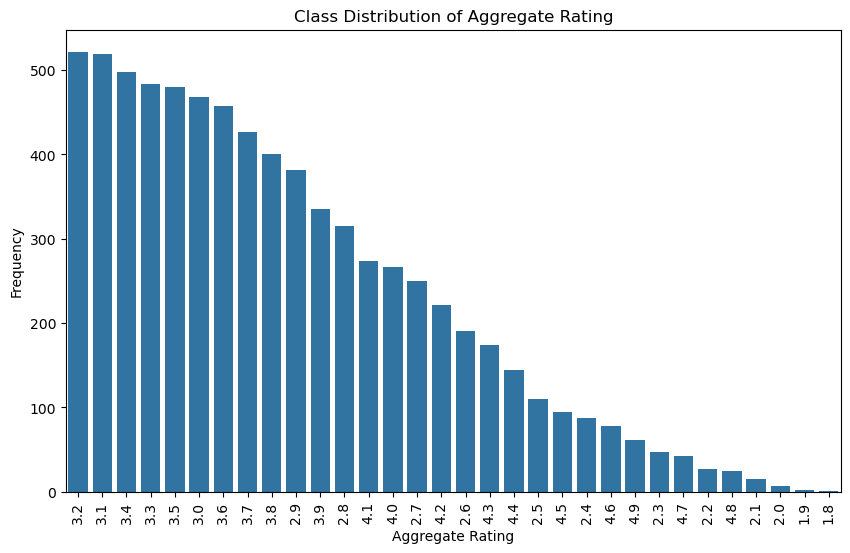

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Aggregate rating', order=df['Aggregate rating'].value_counts().index)
plt.title('Class Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [85]:
import pandas as pd

# Define a function to categorize the ratings
def categorize_rating(rating):
    if pd.isna(rating):  # Check if the value is NaN
        return 'Unknown'
    elif rating < 2.5:
        return 'Low'
    elif 2.5 <= rating <= 3.5:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to the 'Aggregate rating' column
df['Rating Category'] = df['Aggregate rating'].apply(categorize_rating)

# Check the updated class distribution
rating_category_counts = df['Rating Category'].value_counts()
print("Class distribution of Rating Category:")
print(rating_category_counts)



Class distribution of Rating Category:
Rating Category
Medium     4217
High       3000
Unknown    2148
Low         186
Name: count, dtype: int64


In [86]:
# Replace 'Unknown' with the mode (most frequent rating category)
mode_rating = df['Rating Category'].mode()[0]
df['Rating Category'] = df['Rating Category'].replace('Unknown', mode_rating)

# Check the updated class distribution
rating_category_counts = df['Rating Category'].value_counts()
print("Updated Class Distribution of Rating Category:")
print(rating_category_counts)



Updated Class Distribution of Rating Category:
Rating Category
Medium    6365
High      3000
Low        186
Name: count, dtype: int64


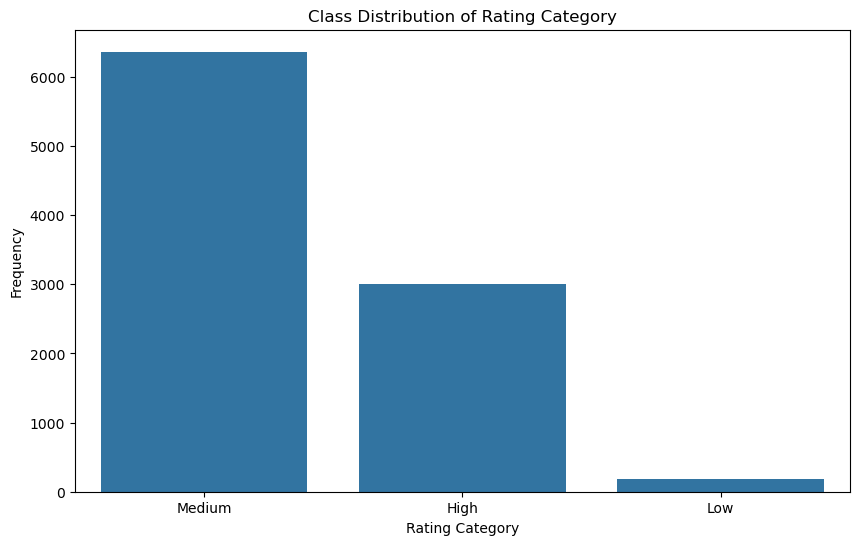

In [87]:
# Visualizing the distribution of the newly created 'Rating Category' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rating Category', order=df['Rating Category'].value_counts().index)
plt.title('Class Distribution of Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.show()


Class Distribution after Downsampling:
Rating Category
High      3000
Medium    3000
Low        186
Name: count, dtype: int64


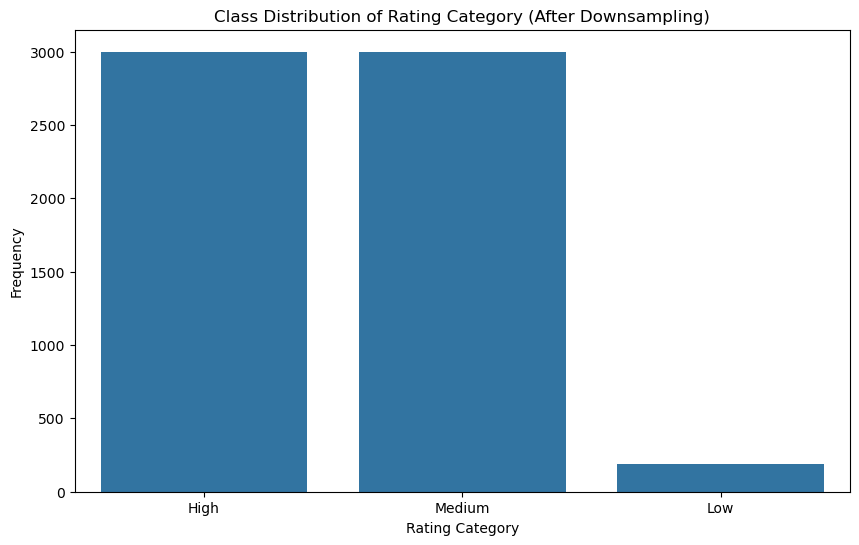

In [88]:
from sklearn.utils import resample

# Separate majority and minority classes
df_medium = df[df['Rating Category'] == 'Medium']
df_high = df[df['Rating Category'] == 'High']
df_low = df[df['Rating Category'] == 'Low']

# Downsample the majority class (Medium) to the size of the minority class (Low or High)
df_medium_downsampled = resample(df_medium, 
                                 replace=False,    # Do not sample with replacement
                                 n_samples=len(df_high),    # Match the size of the minority class
                                 random_state=42)  # For reproducibility

# Combine the downsampled medium class with the others
df_balanced = pd.concat([df_high, df_low, df_medium_downsampled])

# Check the class distribution after downsampling
balanced_class_counts = df_balanced['Rating Category'].value_counts()
print("Class Distribution after Downsampling:")
print(balanced_class_counts)

# Visualize the balanced class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='Rating Category', order=df_balanced['Rating Category'].value_counts().index)
plt.title('Class Distribution of Rating Category (After Downsampling)')
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.show()


Class Distribution after Upsampling:
Rating Category
High      6365
Low       6365
Medium    6365
Name: count, dtype: int64


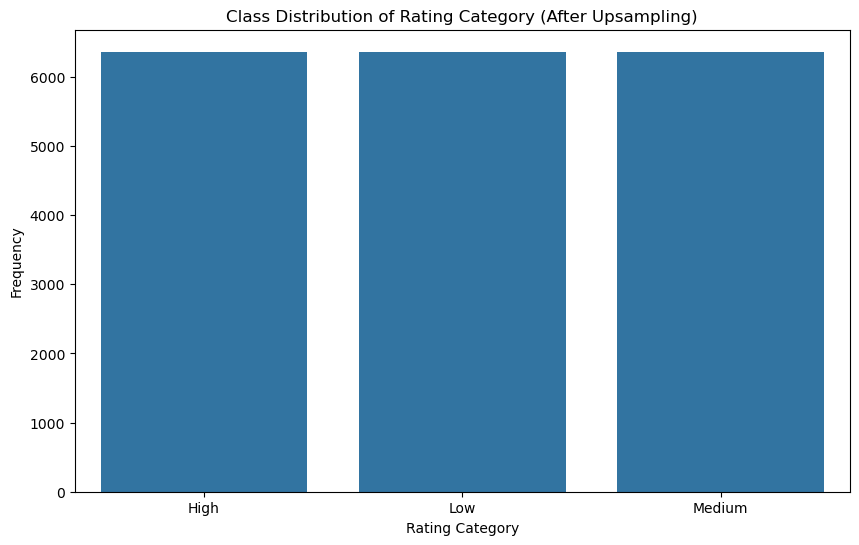

In [89]:
from sklearn.utils import resample

# Upsample the minority classes (High and Low) to match the size of the majority class (Medium)
df_high_upsampled = resample(df_high, 
                             replace=True,  # Sample with replacement
                             n_samples=len(df_medium),  # Match the size of the majority class
                             random_state=42)

df_low_upsampled = resample(df_low, 
                            replace=True, 
                            n_samples=len(df_medium), 
                            random_state=42)

# Combine the upsampled high/low with the medium class
df_balanced_upsampled = pd.concat([df_high_upsampled, df_low_upsampled, df_medium])

# Check the class distribution after upsampling
balanced_class_counts_upsampled = df_balanced_upsampled['Rating Category'].value_counts()
print("Class Distribution after Upsampling:")
print(balanced_class_counts_upsampled)

# Visualize the balanced class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced_upsampled, x='Rating Category', order=df_balanced_upsampled['Rating Category'].value_counts().index)
plt.title('Class Distribution of Rating Category (After Upsampling)')
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.show()


In [90]:
df.to_csv(r'C:\Users\Dell\Documents\TCA2265031\cognifyzdataset_processed.csv', index=False)


In [91]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [92]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Filter out rows where the Z-score is greater than 3 (common threshold for outliers)
df_cleaned = df[(z_scores < 3).all(axis=1)]
print(f"Rows remaining after outlier removal: {df_cleaned.shape[0]}")


Rows remaining after outlier removal: 8692


In [93]:
df['Price-to-Rating Ratio'] = df['Average Cost for two'] / (df['Aggregate rating'] + 1)  # Avoid division by zero


In [94]:
import numpy as np
df['Log_Average Cost for two'] = np.log(df['Average Cost for two'] + 1)  # Avoid log(0)


In [95]:
df = pd.get_dummies(df, columns=['Currency', 'Rating color'], drop_first=True)


In [96]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Restaurant ID                    9551 non-null   int64  
 1   Restaurant Name                  9551 non-null   object 
 2   Country Code                     9551 non-null   int64  
 3   City                             9551 non-null   object 
 4   Address                          9551 non-null   object 
 5   Locality                         9551 non-null   object 
 6   Locality Verbose                 9551 non-null   object 
 7   Longitude                        9551 non-null   float64
 8   Latitude                         9551 non-null   float64
 9   Cuisines                         9551 non-null   object 
 10  Average Cost for two             9551 non-null   int64  
 11  Has Table booking                9551 non-null   bool   
 12  Has Online delivery 

In [97]:
df.to_csv('cleaned_data.csv', index=False)


In [98]:
# TASK 2
# Basic statistical measures for numerical columns
numerical_stats = df.describe()
print(numerical_stats)


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range         Votes  \
count           9551.000000  9551.000000   9551.000000   
mean            1199.210763     1.804837    156.909748   
std            16121.183073     0.905609    430.169145   
min                0.000000     1.000000      0.000000   
25%              250.000000     1.000000      5.000000   
50%              400.000000     2.000000     31.000000   
75%              

In [99]:
import numpy as np
from scipy import stats

# Selecting numerical columns for outlier detection
numerical_columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes', 'Log_Average Cost for two']

# Calculating Z-scores for each numerical column
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Setting a threshold for Z-score (3 is typically used)
threshold = 3

# Identifying outliers (any data point with Z-score greater than 3 is an outlier)
outliers = (z_scores > threshold)

# Counting the number of outliers for each column
outlier_counts = np.sum(outliers, axis=0)

# Display the number of outliers detected for each column
print("Number of outliers detected for each numerical column:")
print(outlier_counts)

# Filtering rows that are outliers in any of the numerical columns
outlier_rows = df[np.any(outliers, axis=1)]

# Display the first few rows that are considered outliers
print("\nSample outlier rows:")
print(outlier_rows.head())


Number of outliers detected for each numerical column:
Longitude                   438
Latitude                    183
Average Cost for two         21
Price range                   0
Votes                       173
Log_Average Cost for two    171
dtype: int64

Sample outlier rows:
    Restaurant ID           Restaurant Name  Country Code       City  \
22        6600681               Chez Michou            30  Bras�_lia   
23        6601005       Caf�� Daniel Briand            30  Bras�_lia   
24        6600292  Casa do Biscoito Mineiro            30  Bras�_lia   
25        6600441                     Maori            30  Bras�_lia   
26        6600970            Pizza �� Bessa            30  Bras�_lia   

                                              Address   Locality  \
22  SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia  Asa Norte   
23   SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia  Asa Norte   
24  SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...  Asa Norte   
25    CLN 110

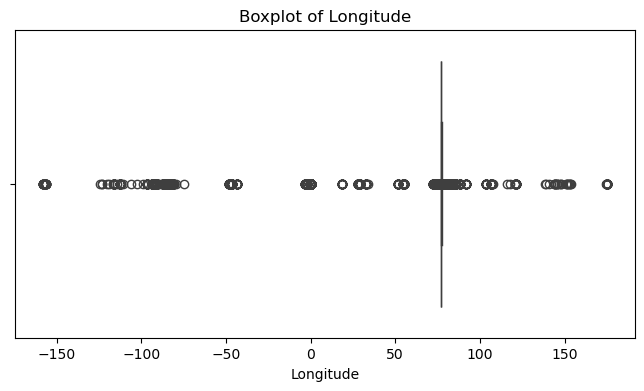

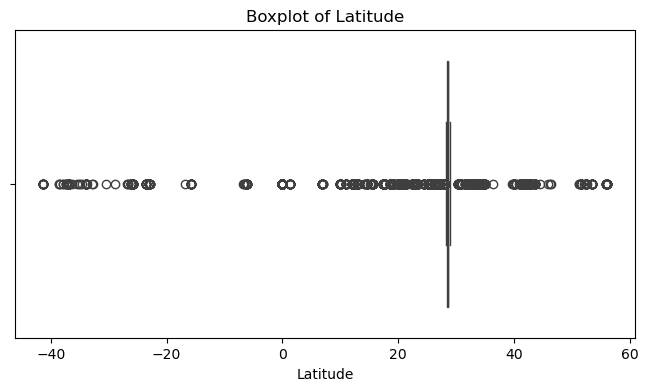

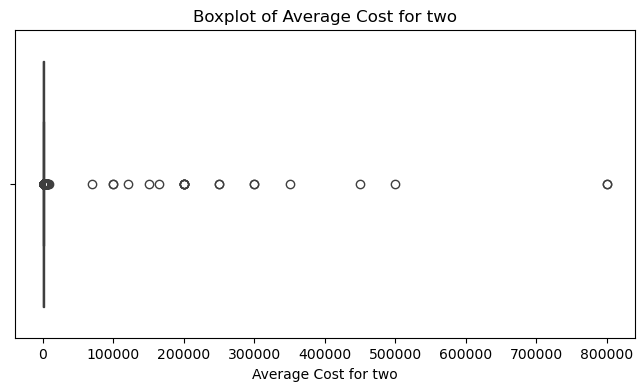

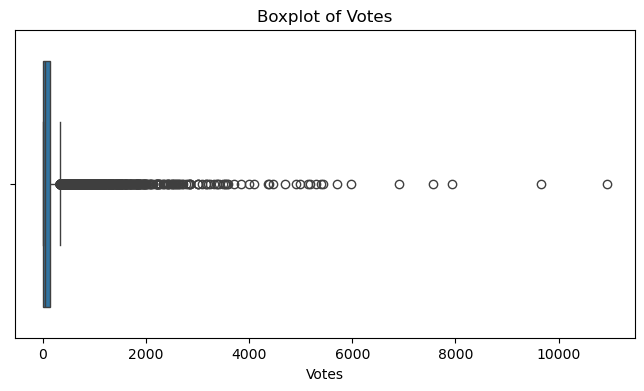

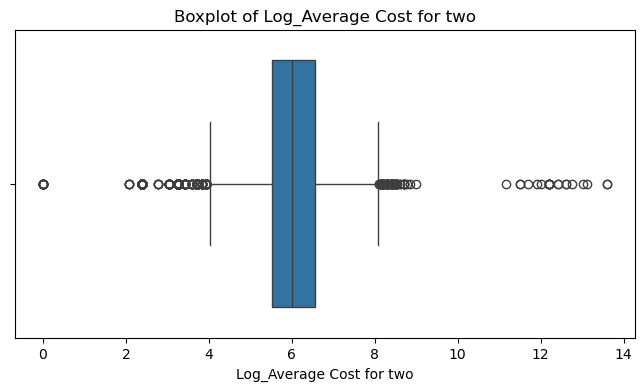

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns to check for outliers
numerical_cols = ['Longitude', 'Latitude', 'Average Cost for two', 'Votes', 'Log_Average Cost for two']

# Generate boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [101]:
import numpy as np

# Cap outliers using 1st and 99th percentile
for col in numerical_cols:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

print("Outliers capped successfully.")


Outliers capped successfully.


In [102]:
print(df[numerical_cols].describe())


         Longitude     Latitude  Average Cost for two        Votes  \
count  9551.000000  9551.000000           9551.000000  9551.000000   
mean     63.962856    25.859731            579.992043   143.178829   
std      39.640111    10.338637            562.094833   302.639420   
min     -93.737906   -26.063810             10.000000     0.000000   
25%      77.081343    28.478713            250.000000     5.000000   
50%      77.191964    28.570469            400.000000    31.000000   
75%      77.282006    28.642758            700.000000   131.000000   
max     106.816181    43.615884           3400.000000  1882.500000   

       Log_Average Cost for two  
count               9551.000000  
mean                   5.947752  
std                    1.023521  
min                    2.397895  
25%                    5.525453  
50%                    5.993961  
75%                    6.552508  
max                    8.131392  


In [103]:
df.to_csv('TASK2cleaned_dataset.csv', index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


In [104]:
# Explore categorical variables
categorical_columns = ['Country Code', 'City', 'Cuisines']

for col in categorical_columns:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts().head(10))  # Show top 10 values for better visibility



Value counts for Country Code:

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

Value counts for City:

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

Value counts for Cuisines:

Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


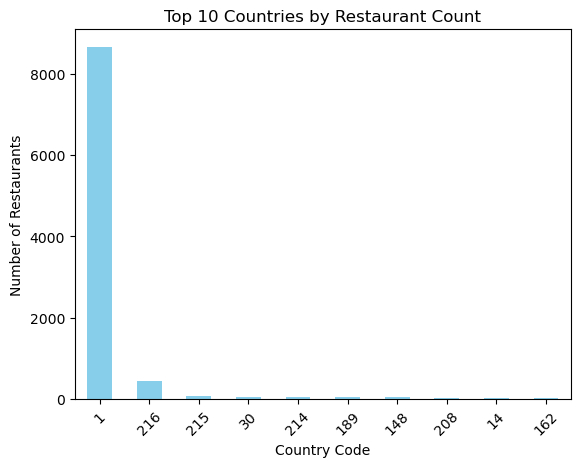

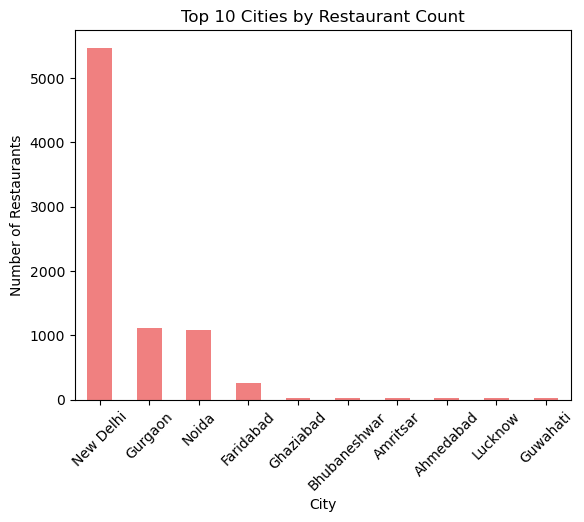

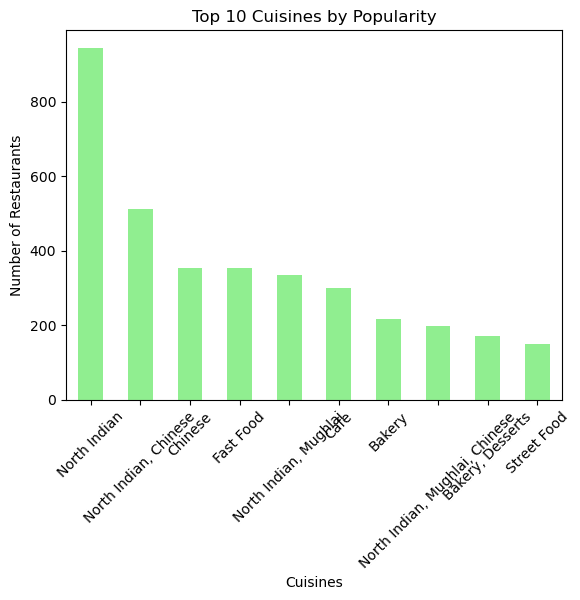

In [105]:
import matplotlib.pyplot as plt

# Plot top 10 countries by restaurant count
df['Country Code'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Restaurant Count')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Plot top 10 cities by restaurant count
df['City'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Cities by Restaurant Count')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Plot top 10 cuisines by restaurant count
df['Cuisines'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cuisines by Popularity')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


Top 10 cities with the highest number of restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


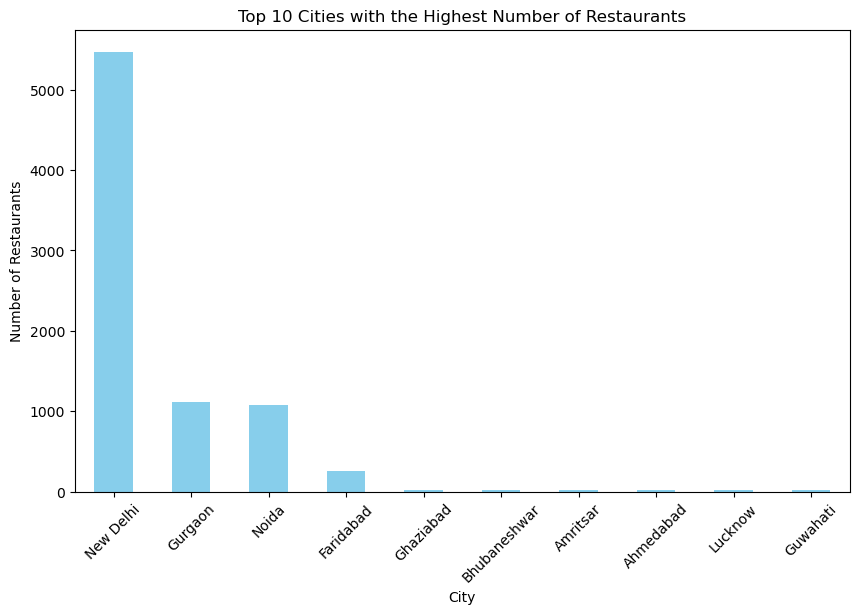

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of restaurants in each city
top_cities = df['City'].value_counts().head(10)

# Display the top cities
print("Top 10 cities with the highest number of restaurants:")
print(top_cities)

# Visualization of top cities
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()



Top 10 cuisines with the highest number of restaurants:
Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


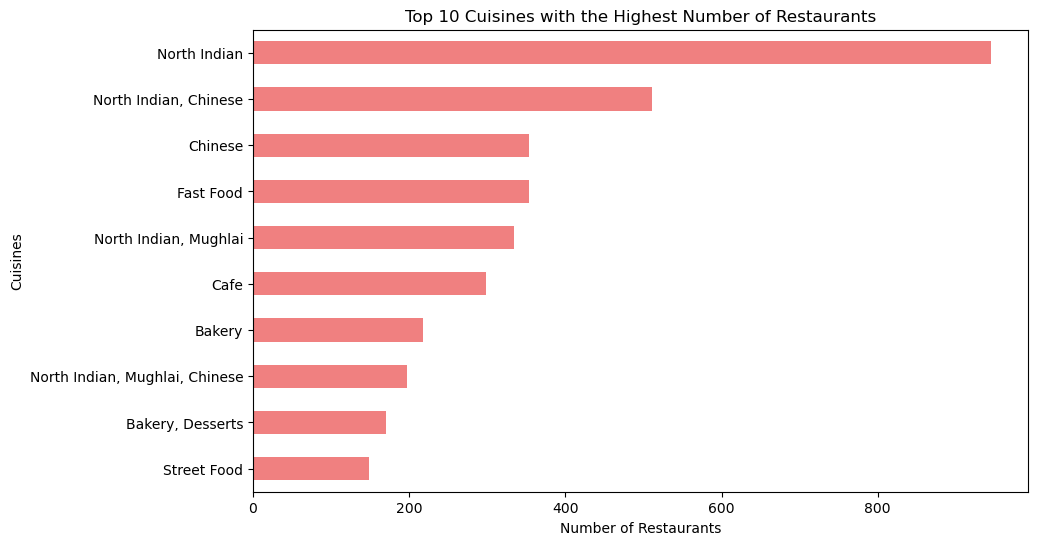

In [107]:
# Count the number of restaurants for each cuisine
top_cuisines = df['Cuisines'].value_counts().head(10)

# Display the top cuisines
print("\nTop 10 cuisines with the highest number of restaurants:")
print(top_cuisines)

# Visualization of top cuisines
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Cuisines with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.gca().invert_yaxis()  # To display highest first
plt.show()


In [108]:
# TASK 3
!pip install folium


In [109]:
# Check if Latitude and Longitude columns are present and their data types
print(df[['Latitude', 'Longitude']].info())

# Check for any missing values in the Latitude and Longitude columns
print(df[['Latitude', 'Longitude']].isnull().sum())

# If there are missing values, you can fill them (if needed) or remove rows with missing coordinates
df_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Confirm that the missing values are handled
print(df_cleaned[['Latitude', 'Longitude']].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   9551 non-null   float64
 1   Longitude  9551 non-null   float64
dtypes: float64(2)
memory usage: 149.4 KB
None
Latitude     0
Longitude    0
dtype: int64
Latitude     0
Longitude    0
dtype: int64


In [110]:
import folium

# Create a map centered around the average latitude and longitude
map_center = [df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each restaurant's location
for index, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(mymap)

# Save the map to an HTML file
mymap.save("restaurant_map.html")

# Display the map
mymap


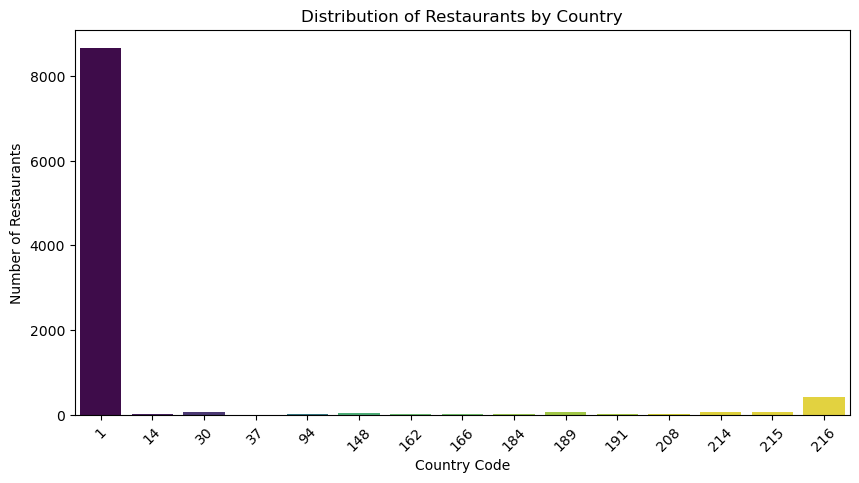

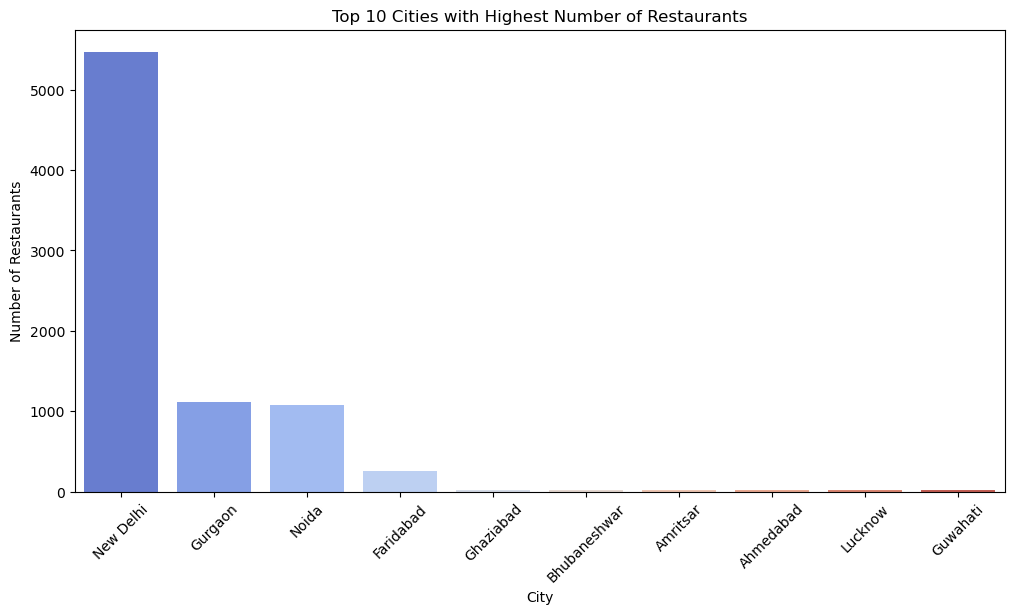

In [149]:
# Plot the distribution of restaurants by Country Code
plt.figure(figsize=(10, 5))
sns.barplot(x=country_distribution.index, y=country_distribution.values, hue=country_distribution.index, palette='viridis', legend=False)
plt.title('Distribution of Restaurants by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of restaurants by Top 10 Cities
plt.figure(figsize=(12, 6))
sns.barplot(x=city_distribution.index[:10], y=city_distribution.values[:10], hue=city_distribution.index[:10], palette='coolwarm', legend=False)
plt.title('Top 10 Cities with Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


In [151]:
# Import necessary libraries
import pandas as pd

# Count the number of restaurants in each country
country_distribution = df['Country Code'].value_counts()

# Count the number of restaurants in each city
city_distribution = df['City'].value_counts()

# Display top countries and cities with the most restaurants
print("Top 5 countries with the most restaurants:")
print(country_distribution.head(5))

print("\nTop 10 cities with the most restaurants:")
print(city_distribution.head(10))


Top 5 countries with the most restaurants:
Country Code
1      8652
216     434
215      80
30       60
214      60
Name: count, dtype: int64

Top 10 cities with the most restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [155]:
# Answer summary
print("The top country with the most restaurants is:", country_distribution.idxmax(), 
      "with", country_distribution.max(), "restaurants.")

print("The top city with the most restaurants is:", city_distribution.idxmax(), 
      "with", city_distribution.max(), "restaurants.")

print("The data suggests that restaurant presence is highly concentrated in", 
      city_distribution.idxmax(), "with a significant number of entries compared to other cities.")


The top country with the most restaurants is: 1 with 8652 restaurants.
The top city with the most restaurants is: New Delhi with 5473 restaurants.
The data suggests that restaurant presence is highly concentrated in New Delhi with a significant number of entries compared to other cities.


In [157]:
# Check relevant columns
print(df[['Latitude', 'Longitude', 'Aggregate rating']].info())
print(df[['Latitude', 'Longitude', 'Aggregate rating']].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          9551 non-null   float64
 1   Longitude         9551 non-null   float64
 2   Aggregate rating  7403 non-null   object 
dtypes: float64(2), object(1)
memory usage: 224.0+ KB
None
Latitude               0
Longitude              0
Aggregate rating    2148
dtype: int64


In [159]:
# Convert 'Aggregate rating' to numeric, coercing errors to NaN
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Check again after conversion
print(df['Aggregate rating'].dtype)


float64


In [161]:
df.dropna(subset=['Aggregate rating'], inplace=True)


In [163]:
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print(correlation_matrix)


                  Latitude  Longitude  Aggregate rating
Latitude          1.000000  -0.012196         -0.193250
Longitude        -0.012196   1.000000         -0.312277
Aggregate rating -0.193250  -0.312277          1.000000


In [165]:
# Interpretation of correlation results
if correlation_matrix.loc['Aggregate rating', 'Latitude'] > -0.3 and correlation_matrix.loc['Aggregate rating', 'Latitude'] < 0.3:
    lat_corr = "weak"
else:
    lat_corr = "strong"

if correlation_matrix.loc['Aggregate rating', 'Longitude'] > -0.3 and correlation_matrix.loc['Aggregate rating', 'Longitude'] < 0.3:
    long_corr = "weak"
else:
    long_corr = "moderate"

print(f"Latitude has a {lat_corr} negative correlation with ratings ({correlation_matrix.loc['Aggregate rating', 'Latitude']:.3f}).")
print(f"Longitude has a {long_corr} negative correlation with ratings ({correlation_matrix.loc['Aggregate rating', 'Longitude']:.3f}).")


Latitude has a weak negative correlation with ratings (-0.193).
Longitude has a moderate negative correlation with ratings (-0.312).


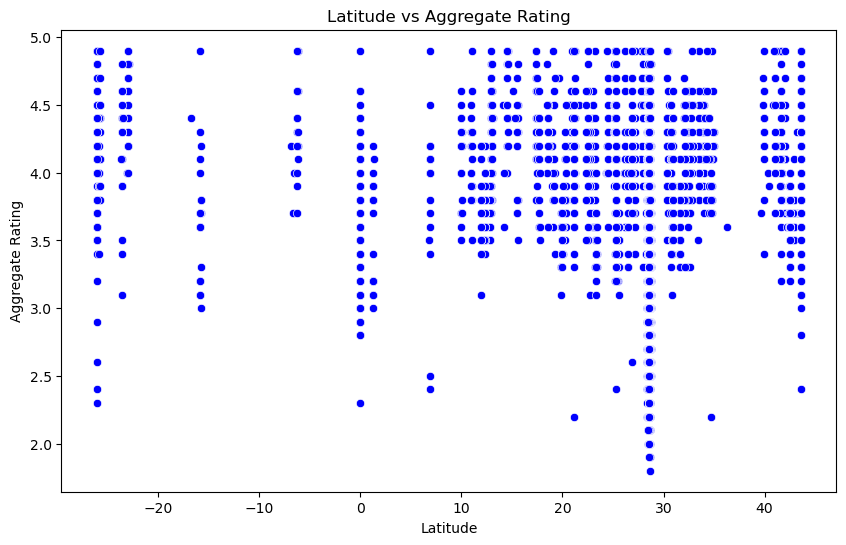

In [169]:
# Scatter plot for Latitude vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Aggregate rating', data=df, color='blue')
plt.title('Latitude vs Aggregate Rating')
plt.xlabel('Latitude')
plt.ylabel('Aggregate Rating')
plt.show()


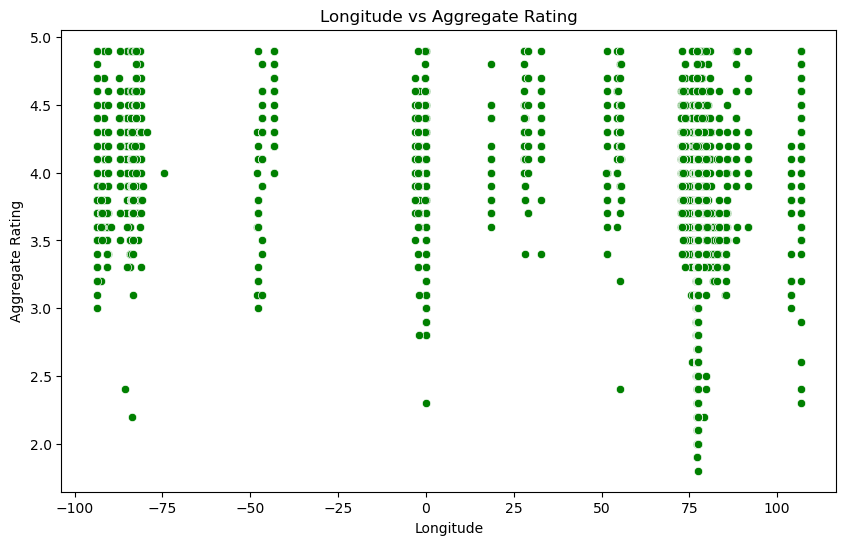

In [171]:
# Scatter plot for Longitude vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Aggregate rating', data=df, color='green')
plt.title('Longitude vs Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')
plt.show()


In [177]:
# Correlation results
latitude_corr = df[['Latitude', 'Aggregate rating']].corr().iloc[0, 1]
longitude_corr = df[['Longitude', 'Aggregate rating']].corr().iloc[0, 1]

# Print out the conclusion based on the correlation
if latitude_corr < 0:
    lat_conclusion = f"Latitude has a negative correlation with ratings ({latitude_corr:.3f})."
else:
    lat_conclusion = f"Latitude has a positive correlation with ratings ({latitude_corr:.3f})."

if longitude_corr < 0:
    lon_conclusion = f"Longitude has a negative correlation with ratings ({longitude_corr:.3f})."
else:
    lon_conclusion = f"Longitude has a positive correlation with ratings ({longitude_corr:.3f})."

# Printing the conclusion
print("Conclusion on Location and Rating Correlation:")
print(lat_conclusion)
print(lon_conclusion)


Conclusion on Location and Rating Correlation:
Latitude has a negative correlation with ratings (-0.193).
Longitude has a negative correlation with ratings (-0.312).
